In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


In [67]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))


In [68]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [69]:
from keras.datasets import mnist
import numpy as np
(x_train, x_train_label), (x_test, x_test_label) = mnist.load_data()


In [70]:
x_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
x_train_f = x_train.astype('float32') / 255.
x_test_f = x_test.astype('float32') / 255.
x_train_flattened = x_train_f.reshape((len(x_train_f), np.prod(x_train_f.shape[1:])))
x_test_flattened = x_test_f.reshape((len(x_test_f), np.prod(x_test_f.shape[1:])))

In [72]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [74]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1647 - val_loss: 0.1612
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1605 - val_loss: 0.1571
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1566 - val_loss: 0.1533
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1530 - val_loss: 0.1499
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1496 - val_loss: 0.1466
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1464 - val_loss: 0.1434
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1434 - val_loss: 0.1406
Epoch 8/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1407 - val_loss: 0.1379
Epoch 9/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1381 - val_loss: 0.1353
Epoch

In [75]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [76]:
encoded_imgs = encoder.predict(x_test_flattened)
decoded_imgs = decoder.predict(encoded_imgs)

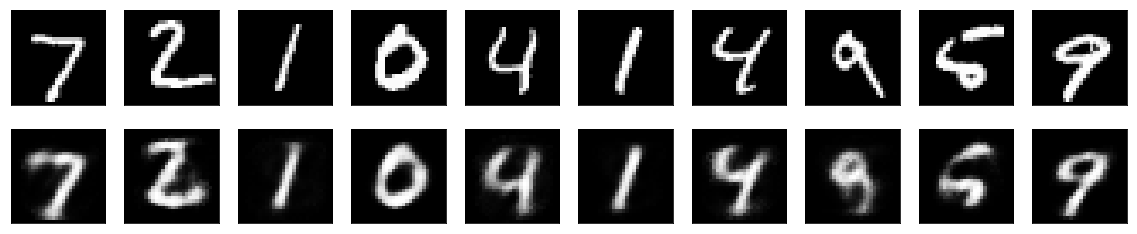

In [77]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding regularizers (sparcity constraints) to silence some nodes at times.

In [34]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,
                activation = 'relu',
                activity_regularizer = regularizers.l1(10e-5))(input_img)
decoded = Dense(784,
                activation = 'sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Deep autoencoder

In [78]:
input_img = Input(shape = (784, ))

encoded = Dense(64, activation = 'relu')(input_img)
encoded = Dense(32, activation = 'relu')(encoded)

decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

deep_autoencoder = Model(input_img, decoded)

In [79]:
deep_autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [80]:
deep_autoencoder.fit(x_train, x_train,
                     epochs = 20,
                     batch_size = 256,
                     shuffle = True,
                     validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2375 - val_loss: 0.1648
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1488 - val_loss: 0.1347
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1290 - val_loss: 0.1220
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.1199 - val_loss: 0.1153
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1146 - val_loss: 0.1108
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1108 - val_loss: 0.1077
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1079 - val_loss: 0.1052
Epoch 8/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1053 - val_loss: 0.1027
Epoch 9/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1028 - val_loss: 0.1003
Epoch

In [82]:
deep_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 784)               101136    
Total params: 163,888
Trainable params: 163,888
Non-trainable params: 0
_________________________________________________________________


In [88]:
decoded_imgs = deep_autoencoder.predict(x_test)

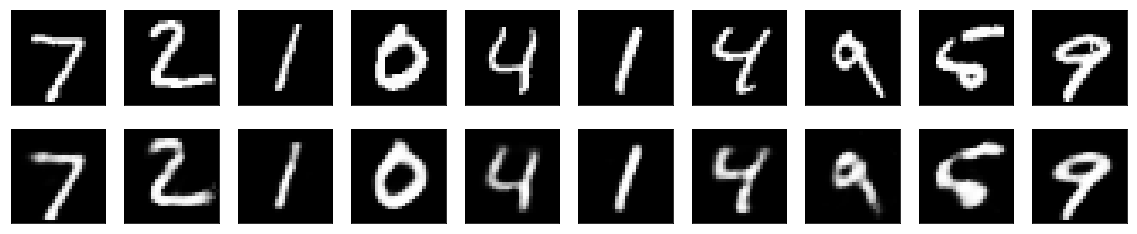

In [89]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [144]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#decoded = Dense(784, activation='sigmoid')(x)

convnet_autoencoder = Model(input_img, decoded)

In [145]:
convnet_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [146]:
convnet_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 8)           0         
__________

In [147]:
(x_train, x_train_label), (x_test, x_test_label) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [148]:
x_train_reshaped = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_train_flattened = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_reshaped = np.reshape(x_test, (len(x_test), 28, 28, 1))
#x_test_flattened = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [149]:
x_train_reshaped.shape

(60000, 28, 28, 1)

In [150]:
x_train_flattened.shape

(60000, 784)

### at terminal, type: tensorboard --logdir=~/Downloads/convnet_autoencoder or any matching directory

In [152]:
from keras.callbacks import TensorBoard

convnet_autoencoder.fit(x_train_reshaped, x_train_reshaped,
                        epochs=10,
                        batch_size=128,
                        shuffle=True,
                        validation_data=(x_test_reshaped, x_test_reshaped),
                        callbacks=[TensorBoard(log_dir='/Users/zhong/Downloads/convnet_autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1226 - val_loss: 0.1178
Epoch 2/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1167 - val_loss: 0.1134
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1131 - val_loss: 0.1104
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1104 - val_loss: 0.1082
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1083 - val_loss: 0.1064
Epoch 6/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1066 - val_loss: 0.1046
Epoch 7/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1052 - val_loss: 0.1034
Epoch 8/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1041 - val_loss: 0.1024
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1031 - val_loss: 0.1018
Epoch

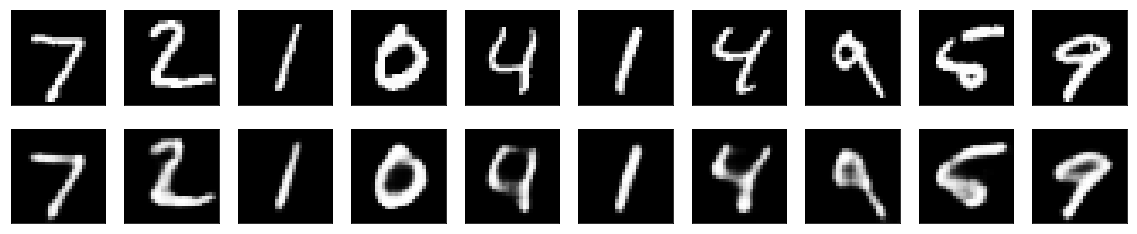

In [154]:
decoded_imgs = convnet_autoencoder.predict(x_test_reshaped)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_reshaped[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [157]:
convnet_encoder = Model(input_img, encoded)
encoded_imgs = convnet_encoder.predict(x_test_reshaped)

### Visualize encoded images by convnet_encoder
### Convert to 4x32 array to enable 2d visualization

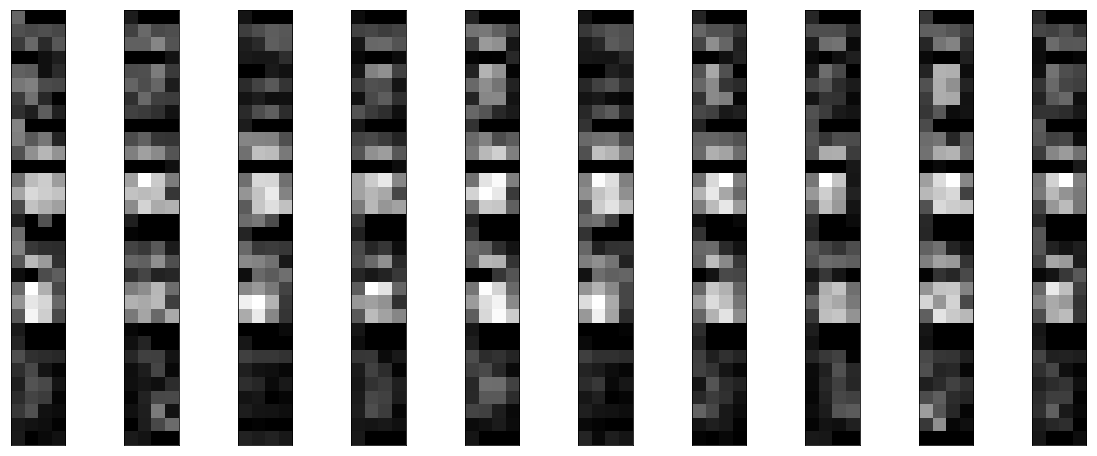

In [160]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Using convnet_autoencoder to denoise a specific set of images.

In [162]:
t = np.random.normal(loc=0.0, scale=1.0, size=(10,10))

In [163]:
t

array([[-0.51227206,  0.47087324, -1.14104077,  2.0338052 ,  1.48334906,
         0.74004166,  0.51224728, -0.08730603, -0.02176469, -0.19054496],
       [-0.95495093,  0.43656208, -1.06908983, -0.90795594,  2.7454576 ,
        -1.90526181,  0.30859945,  0.24681721, -2.21569241, -2.90658417],
       [-0.34068524,  1.41355902, -1.22570651,  0.25156765, -0.82681297,
         0.62551858, -2.16648195, -0.39341967,  0.03940577,  0.5419561 ],
       [ 1.06003875,  0.83514254,  1.26274435, -0.15817527,  1.18539965,
        -2.25711817, -0.22499886, -0.31570137,  0.49169553, -0.13390646],
       [ 0.08142832, -1.18043221, -1.5876366 , -1.37531775,  0.55521707,
        -0.93173695, -0.20696177, -1.22194055, -0.28902824,  1.35801527],
       [ 0.38167457,  2.05035167, -1.02516934,  0.9579454 ,  1.03603747,
         0.38960497,  0.20336592,  0.16992641, -1.81317524,  0.70666805],
       [-0.14879092,  0.66248046, -0.77140594,  0.46487552,  2.23710417,
        -0.65286194,  0.27821499, -0.44901924

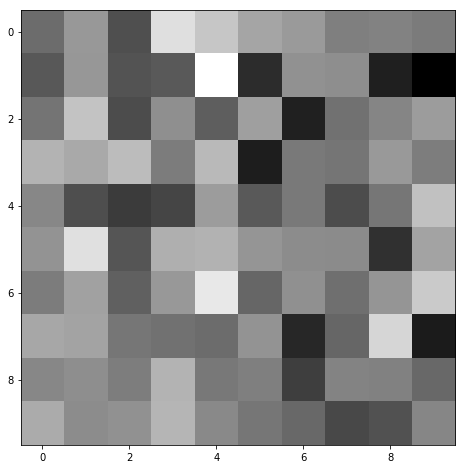

In [167]:
plt.figure(figsize=(8,8))
plt.imshow(t)


In [191]:
(x_train, x_train_label), (x_test, x_test_label) = mnist.load_data()

x_train_normed = x_train.astype('float32') / 255.
x_test_normed = x_test.astype('float32') / 255.
x_train_normed_reshaped = np.reshape(x_train_normed, (len(x_train_normed), 28, 28, 1))
x_test_normed_reshaped = np.reshape(x_test_normed, (len(x_test_normed), 28, 28, 1))
#x_train_normed_reshaped = np.reshape(x_train_normed, (len(x_train_normed), 28, 28))
#x_test_normed_reshaped = np.reshape(x_test_normed, (len(x_test_normed), 28, 28))

noise_factor = 0.5
x_train_noised = x_train_normed_reshaped + noise_factor * np.random.normal(loc=0.5, scale=1.0, size=x_train_normed_reshaped.shape)
x_test_noised = x_test_normed_reshaped + noise_factor * np.random.normal(loc=0.5, scale=1.0, size=x_test_normed_reshaped.shape)

x_train_noised_clipped = np.clip(x_train_noised, 0., 1.)
x_test_noised_clipped = np.clip(x_test_noised, 0., 1.)


In [187]:
x_train_noised_clipped[1]
x_train_normed_reshaped.shape

(60000, 28, 28, 1)

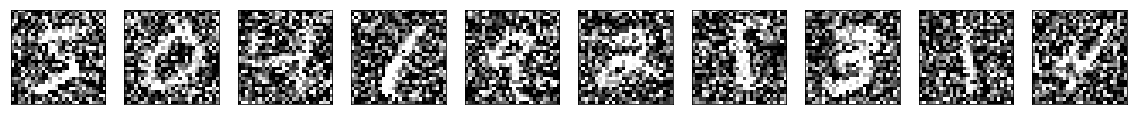

In [174]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noised_clipped[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [192]:
print('x_train: ', x_train.shape)
print('x_train_noised_clipped: ', x_train_noised_clipped.shape)

x_train:  (60000, 28, 28)
x_train_noised_clipped:  (60000, 28, 28, 1)


In [177]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [188]:
x_train_noised_clipped[1]

array([[[0.87147513],
        [0.        ],
        [0.        ],
        [0.72629013],
        [0.        ],
        [0.        ],
        [0.51493996],
        [1.        ],
        [0.47895585],
        [0.        ],
        [1.        ],
        [0.05619971],
        [1.        ],
        [0.36453064],
        [0.131515  ],
        [0.        ],
        [0.        ],
        [0.42884238],
        [0.        ],
        [0.21125688],
        [0.        ],
        [0.        ],
        [0.37830908],
        [0.63549079],
        [0.62801914],
        [0.        ],
        [0.96910861],
        [0.        ]],

       [[0.09568492],
        [0.33485769],
        [0.        ],
        [0.        ],
        [0.46829579],
        [0.83009572],
        [0.        ],
        [0.54140511],
        [0.29505036],
        [1.        ],
        [0.6629552 ],
        [1.        ],
        [0.08376944],
        [0.71674747],
        [0.49120644],
        [0.        ],
        [0.21649073],
        

In [189]:
convnet_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 8)           0         
__________

In [194]:
convnet_autoencoder.fit(x_train_noised_clipped, x_train_normed_reshaped,
                        epochs = 10,
                        batch_size = 128,
                        shuffle = True,
                        verbose = 1,
                        validation_data = (x_test_noised_clipped, x_test_normed_reshaped), 
                        callbacks = [TensorBoard(log_dir='/Users/zhong/Downloads/convnet_autoencoder_noise_removal')])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1624 - val_loss: 0.1483
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1439 - val_loss: 0.1392
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1383 - val_loss: 0.1355
Epoch 4/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1353 - val_loss: 0.1328
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1332 - val_loss: 0.1312
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1314 - val_loss: 0.1293
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1300 - val_loss: 0.1286
Epoch 8/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1289 - val_loss: 0.1271
Epoch 9/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1280 - val_loss: 0.1263
Epoch

In [200]:
denoised_imgs = convnet_autoencoder.predict(x_train_noised_clipped)

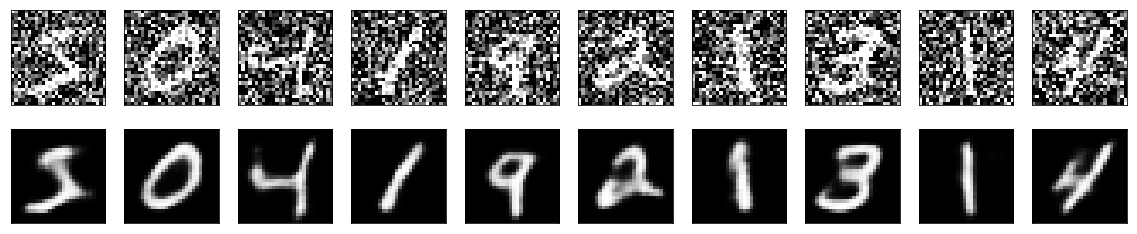

In [201]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noised_clipped[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()